# Heart Attack Prediction in India

## DSCI 310 Group Project

## By: Chengyou Xiang, Junhao Wen, Peng Zhong, ZiXun Fang

## 1. Summary

## 2. Introduction

### Background Information

Heart attacks together with cardiovascular diseases rank as the main leading causes of global mortality statistics. The knowledge of heart attack risks serves essential purposes for both preventive measures and early treatment. Multiple researchstudies demonstrate that lifestyle choices and genetic characteristics along with pre-existing medical issues function as the main risk factors for heart attacks. The research requires deeper evaluation of heart attack risks in particular populations since regional background and demographic factors can create differences in risk factors.

### Dataset Overview
The Heart Attack Risk & Prediction Dataset in India serves as an extensive data collection for studying heart attack risk variables that affect Indian individuals. The database contains different indicators about demographic profiles and lifestyle practices and medical background information which might affect heart attack probability. This research dataset enables scientists to discover leading risk indicators of heart attacks in Indians while creating predictive models for heart attack identification programs.

The dataset includes 26 attributes:
1. Patient ID
2. State Name
3. Age
4. Gender
5. Diabetes
6. Hypertension
7. Obesity
8. Smoking
9. Alcohol Consumption
10. Physical Activity 
11. Diet Score
12. Cholesterol Level
13. Tryglyceride Level
14. LDL Level
15. HDL Level
16. Systolic BP
17. Diastolic BP
18. Air Pollution Exposure
19. Family History
20. Stress Level
21. Healthcare Access
22. Heart Attack History
23. Emergency Response Time
24. Annual Income
25. Health Insurance
26. Heart Attack Risk

### Research Question

The primary research question we aim to answer is:
##### Which factors are most strongly associated with heart attack risk?

To address this, we will use statistical and machine learning techniques to identify the most significant predictors of heart attack risk from the dataset. 

### Literature Context

Additionally, we will review existing literature on cardiovascular health, particularly studies that analyze heart attack risk factors in different populations. One relevant study is "Number of years with obesity and incident heart failure among US adults (Ndumele, 2018)." Research found that long-term obesity duration is an independent risk factor for heart damage, even in the absence of traditional risk factors like hypertension or diabetes. The longer an individual remains overweight or obese, the higher their risk of heart disease. 

Another research by WHO, "Cardiovascular diseases", examines how unhealthy lifestyle behaviors, including poor diet, physical inactivity, smoking, and excessive alcohol consumption, become major contributors to cardiovascular diseases (WHO, 2017). 

## 3. Methods & Results

### Exploratory Data Analysis (EDA)

In [78]:
install.packages(c("tidyverse", "repr", "broom", "GGally", "glmnet", "corrplot", "car", "caret", "randomForest"))

Warning message:
"packages 'tidyverse', 'repr', 'broom', 'GGally', 'glmnet', 'corrplot', 'car', 'caret', 'randomForest' are in use and will not be installed"


In [79]:
library(tidyverse)
library(repr)
library(broom)
library(GGally)
library(glmnet)
library(dplyr)
library(ggplot2)
library(corrplot)
library(car)
library(caret)
library(pROC)
library(randomForest)

In [48]:
heart_attack_data <- read_csv("data/heart_attack_prediction_india.csv")

Rows: 10000 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): State_Name, Gender
dbl (24): Patient_ID, Age, Diabetes, Hypertension, Obesity, Smoking, Alcohol...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [49]:
colSums(is.na(heart_attack_data))

Patient_ID              State_Name                     Age 
                      0                       0                       0 
                 Gender                Diabetes            Hypertension 
                      0                       0                       0 
                Obesity                 Smoking     Alcohol_Consumption 
                      0                       0                       0 
      Physical_Activity              Diet_Score       Cholesterol_Level 
                      0                       0                       0 
     Triglyceride_Level               LDL_Level               HDL_Level 
                      0                       0                       0 
            Systolic_BP            Diastolic_BP  Air_Pollution_Exposure 
                      0                       0                       0 
         Family_History            Stress_Level       Healthcare_Access 
                      0                       0                       0 
   Heart_Attack_History Emergency_Response_Time           Annual_Income 
                      0                       0                       0 
       Health_Insurance       Heart_Attack_Risk 
                      0                       0

In [50]:
str(heart_attack_data)

spc_tbl_ [10,000 × 26] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Patient_ID             : num [1:10000] 1 2 3 4 5 6 7 8 9 10 ...
 $ State_Name             : chr [1:10000] "Rajasthan" "Himachal Pradesh" "Assam" "Odisha" ...
 $ Age                    : num [1:10000] 42 26 78 58 22 31 26 68 45 52 ...
 $ Gender                 : chr [1:10000] "Female" "Male" "Male" "Male" ...
 $ Diabetes               : num [1:10000] 0 0 0 1 0 0 0 0 0 1 ...
 $ Hypertension           : num [1:10000] 0 0 0 0 0 0 0 0 0 0 ...
 $ Obesity                : num [1:10000] 1 0 1 1 0 0 0 1 0 0 ...
 $ Smoking                : num [1:10000] 1 0 0 0 0 0 0 0 0 1 ...
 $ Alcohol_Consumption    : num [1:10000] 0 1 0 0 0 0 0 0 0 0 ...
 $ Physical_Activity      : num [1:10000] 0 1 1 1 1 0 0 0 0 0 ...
 $ Diet_Score             : num [1:10000] 9 4 6 9 5 7 9 2 3 1 ...
 $ Cholesterol_Level      : num [1:10000] 248 272 268 224 277 188 210 160 264 167 ...
 $ Triglyceride_Level     : num [1:10000] 125 51 213 250 129 218 155 275 242

In [51]:
heart_attack_data_clean <- heart_attack_data |>
    select(-Patient_ID, -State_Name, -Gender) |>
    mutate(
        Diabetes = as.factor(Diabetes),
        Hypertension = as.factor(Hypertension),
        Obesity = as.factor(Obesity),
        Smoking = as.factor(Smoking),
        Alcohol_Consumption = as.factor(Alcohol_Consumption),
        Physical_Activity = as.factor(Physical_Activity),
        Air_Pollution_Exposure = as.factor(Air_Pollution_Exposure),
        Family_History = as.factor(Family_History),
        Heart_Attack_History = as.factor(Heart_Attack_History),
        Health_Insurance = as.factor(Health_Insurance)
        # Heart_Attack_Risk = as.factor(Heart_Attack_Risk)
    )

head(heart_attack_data_clean)

Age,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,Triglyceride_Level,⋯,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>
42,0,0,1,1,0,0,9,248,125,⋯,119,1,0,4,0,0,157,611025,0,0
26,0,0,0,0,1,1,4,272,51,⋯,115,0,0,7,0,0,331,174527,0,0
78,0,0,1,0,0,1,6,268,213,⋯,117,0,1,10,1,0,186,1760112,1,0
58,1,0,1,0,0,1,9,224,250,⋯,65,0,0,1,1,1,324,1398213,0,0
22,0,0,0,0,0,1,5,277,129,⋯,109,0,0,9,0,0,209,97987,0,1
31,0,0,0,0,0,0,7,188,218,⋯,97,0,1,3,0,0,93,399442,0,0


In [52]:
heart_attack_model <- glm(Heart_Attack_Risk ~ .,
    data = heart_attack_data_clean,
    family = binomial(link = 'logit'))

heart_attack_model_result <- 
    tidy(heart_attack_model, conf.int = TRUE) |>
    mutate_if(is.numeric, round, 2)

heart_attack_model_result
summary(heart_attack_model)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-1.04,0.25,-4.15,0.00,-1.53,-0.55
Age,0.00,0.00,1.64,0.10,0.00,0.00
Diabetes1,-0.07,0.08,-0.95,0.34,-0.22,0.08
Hypertension1,-0.01,0.05,-0.16,0.87,-0.11,0.09
Obesity1,-0.01,0.05,-0.27,0.79,-0.11,0.08
Smoking1,-0.06,0.05,-1.26,0.21,-0.15,0.03
Alcohol_Consumption1,-0.08,0.05,-1.80,0.07,-0.17,0.01
Physical_Activity1,0.03,0.04,0.57,0.57,-0.06,0.11
Diet_Score,0.01,0.01,1.12,0.26,-0.01,0.02



Call:
glm(formula = Heart_Attack_Risk ~ ., family = binomial(link = "logit"), 
    data = heart_attack_data_clean)

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -1.037e+00  2.497e-01  -4.152  3.3e-05 ***
Age                      2.072e-03  1.266e-03   1.637   0.1017    
Diabetes1               -7.212e-02  7.616e-02  -0.947   0.3437    
Hypertension1           -8.236e-03  5.073e-02  -0.162   0.8710    
Obesity1                -1.278e-02  4.758e-02  -0.269   0.7882    
Smoking1                -6.049e-02  4.787e-02  -1.264   0.2063    
Alcohol_Consumption1    -8.261e-02  4.595e-02  -1.798   0.0722 .  
Physical_Activity1       2.540e-02  4.461e-02   0.570   0.5690    
Diet_Score               7.784e-03  6.920e-03   1.125   0.2606    
Cholesterol_Level       -1.039e-04  5.042e-04  -0.206   0.8367    
Triglyceride_Level      -1.378e-04  3.071e-04  -0.449   0.6535    
LDL_Level                1.075e-03  5.038e-04   2.134   0.0328 * 

In [53]:
significant_vars <- tidy(heart_attack_model) |>
    filter(term != "(Intercept)" & p.value < 0.15) |>
    pull(term)
significant_vars

[1] "Age"                     "Alcohol_Consumption1"   
[3] "LDL_Level"               "Emergency_Response_Time"

In [54]:
heart_attack_data_simplified <- heart_attack_data_clean |>
    select(Age, Alcohol_Consumption, LDL_Level, Emergency_Response_Time, Heart_Attack_Risk)
head(heart_attack_data_simplified)

Age,Alcohol_Consumption,LDL_Level,Emergency_Response_Time,Heart_Attack_Risk
<dbl>,<fct>,<dbl>,<dbl>,<dbl>
42,0,93,157,0
26,1,153,331,0
78,0,130,186,0
58,0,130,324,0
22,0,150,209,1
31,0,105,93,0


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


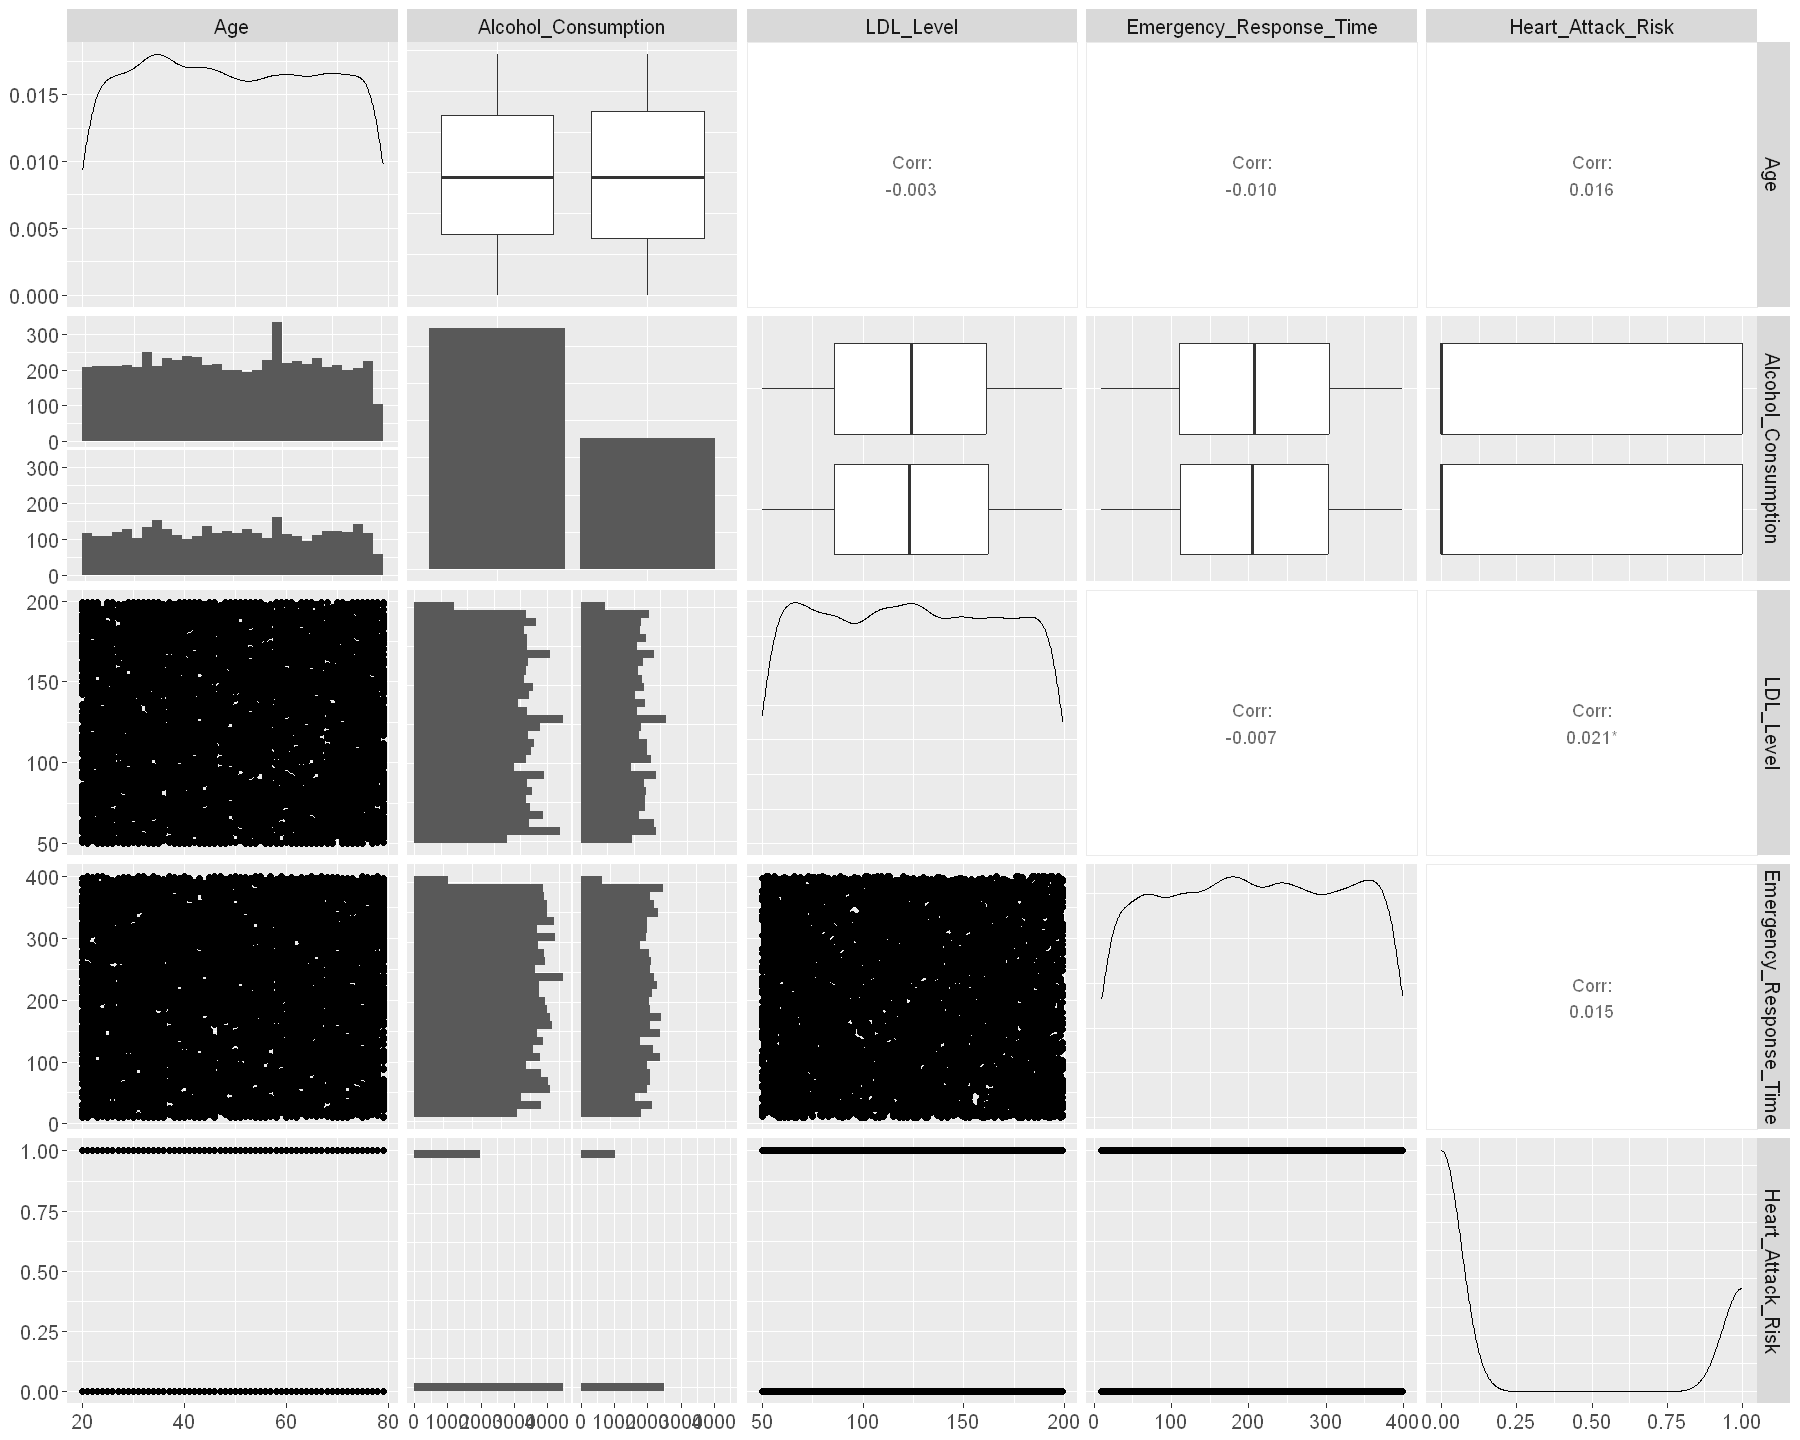

In [55]:
options(repr.plot.width = 15, repr.plot.height=12)

heart_attack_pair_plot <- heart_attack_data_simplified |>
    ggpairs(progress = FALSE) +
    theme(text = element_text(size = 15))

heart_attack_pair_plot

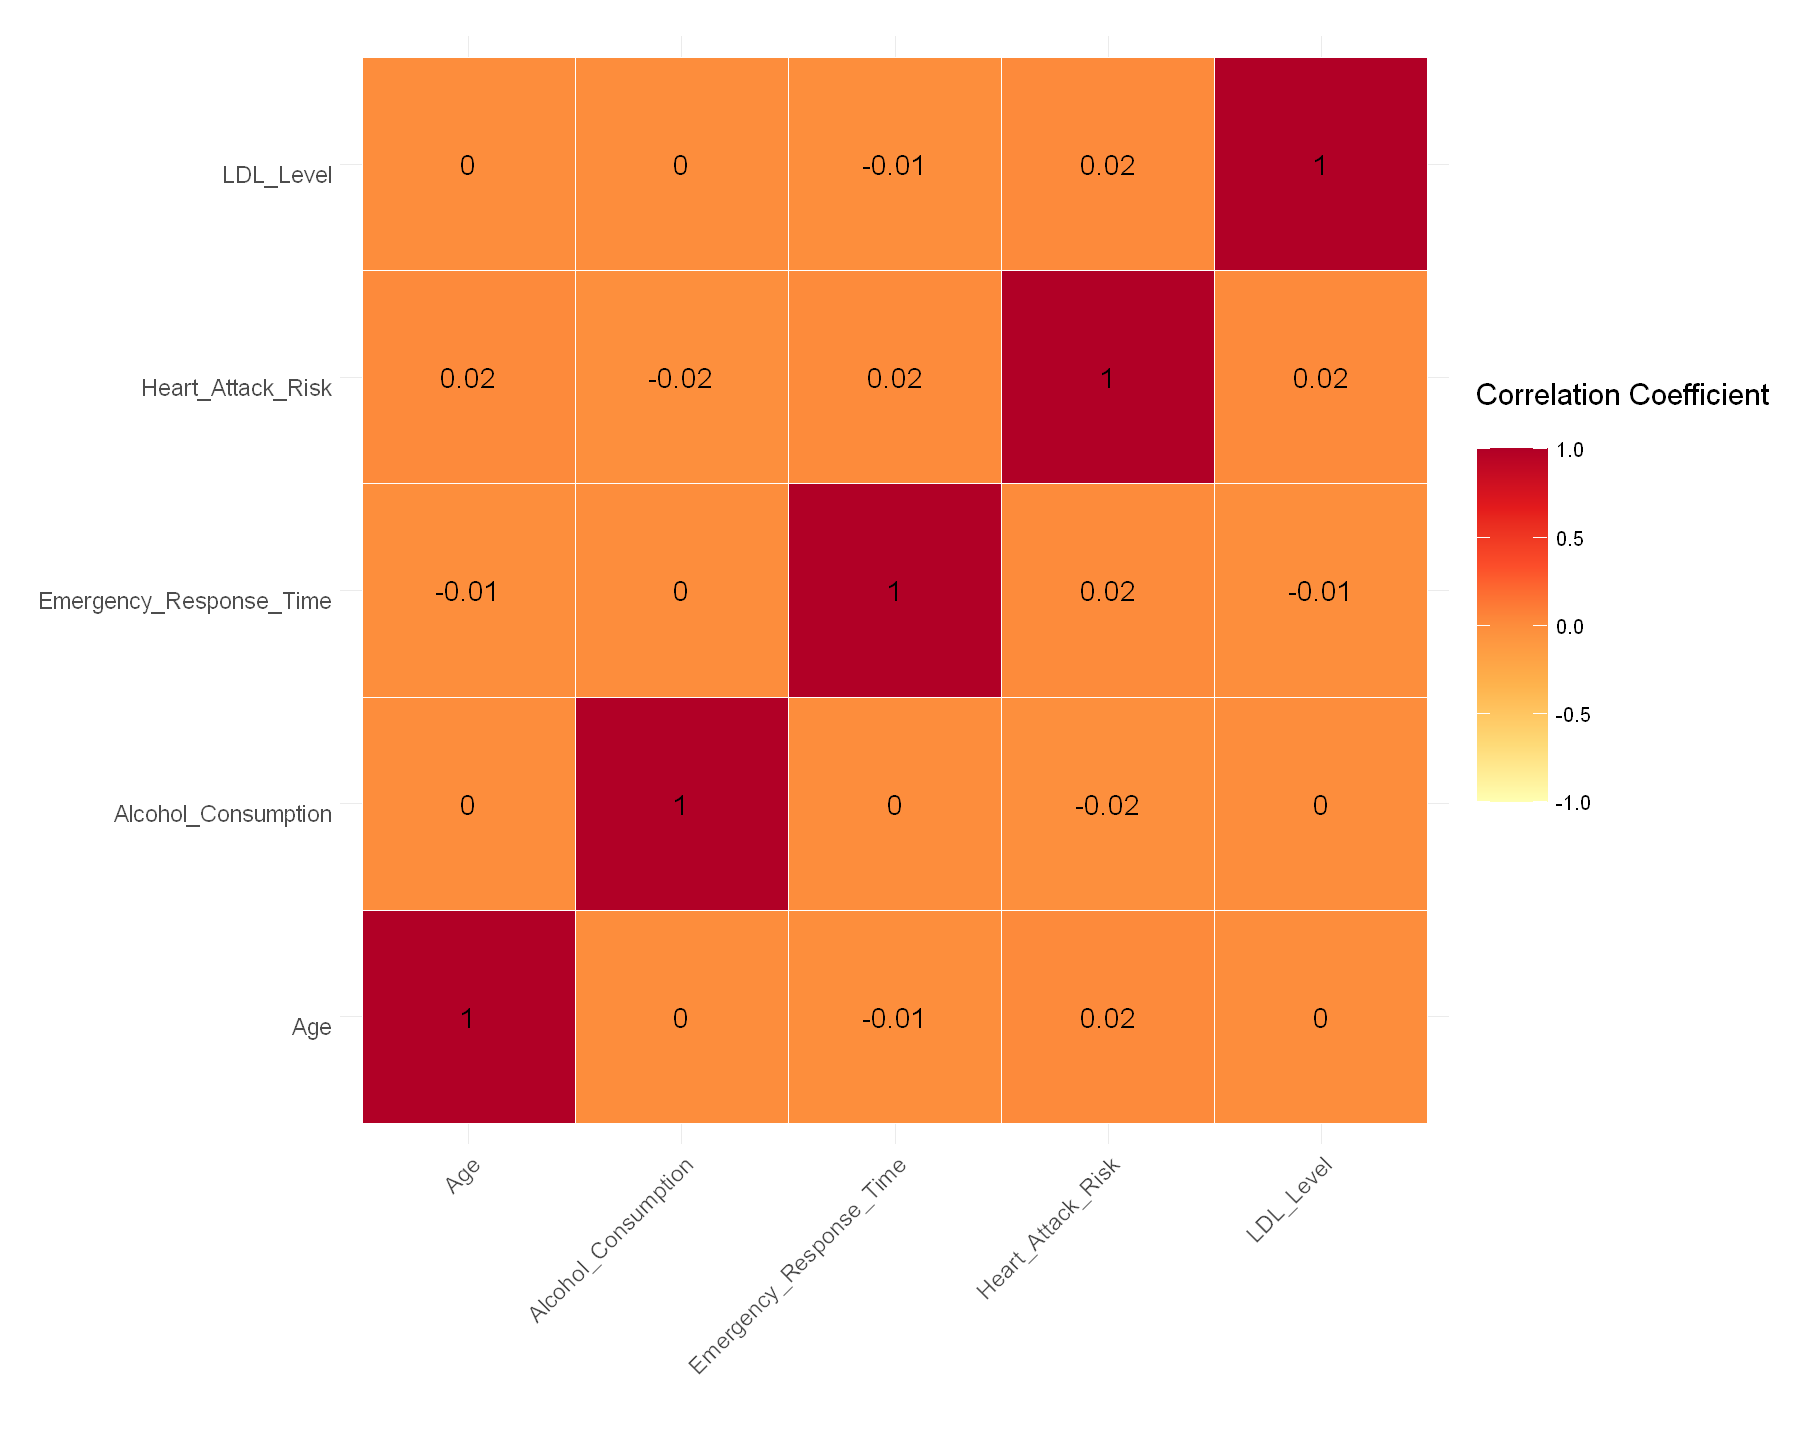

In [56]:
heart_attack_data_simplified <- heart_attack_data_simplified |>
    mutate(
        Alcohol_Consumption = as.numeric(Alcohol_Consumption),
        Heart_Attack_Risk = as.numeric(Heart_Attack_Risk)
    )

plot_corr_matrix_heart_attact <-
    heart_attack_data_simplified |>
    cor() |>
    as_tibble(rownames = 'var1') |>
    pivot_longer(-var1, names_to = "var2", values_to = "corr") |>
    ggplot(aes(x = var1, y = var2)) +
    geom_tile(aes(fill = corr), color = "white") +
    scale_fill_distiller("Correlation Coefficient \n", palette = "YlOrRd", direction = 1, limits = c(-1,1)) +
    labs(x = "", y = "") +
    theme_minimal() +
    theme(
        axis.text.x = element_text(angle = 45, vjust = 1, size = 14, hjust = 1),
        axis.text.y = element_text(vjust = 1, size = 14, hjust = 1),
        legend.title = element_text(size = 18),
        legend.text = element_text(size = 12),
        legend.key.size = unit(1.5, "cm")) +
    coord_fixed() +
    geom_text(aes(x = var1, y = var2, label = round(corr, 2)), color = "black", size = 6)


plot_corr_matrix_heart_attact

In [57]:
# heart_attack_data_simplified <- heart_attack_data_simplified |>
#     mutate(
#         Alcohol_Consumption = as.factor(Alcohol_Consumption),
#         Heart_Attack_Risk = as.factor(Heart_Attack_Risk)
#     )

heart_attack_simplified_model <- glm(
    Heart_Attack_Risk ~ .,
    data = heart_attack_data_simplified,
    family = binomial(link = "logit")
)

summary(heart_attack_simplified_model)


Call:
glm(formula = Heart_Attack_Risk ~ ., family = binomial(link = "logit"), 
    data = heart_attack_data_simplified)

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -1.0311959  0.1179216  -8.745   <2e-16 ***
Age                      0.0019851  0.0012628   1.572   0.1159    
Alcohol_Consumption     -0.0789945  0.0458861  -1.722   0.0852 .  
LDL_Level                0.0010743  0.0005029   2.136   0.0327 *  
Emergency_Response_Time  0.0002994  0.0001942   1.542   0.1232    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 12229  on 9999  degrees of freedom
Residual deviance: 12217  on 9995  degrees of freedom
AIC: 12227

Number of Fisher Scoring iterations: 4


In [58]:
head(heart_attack_data_simplified)

Age,Alcohol_Consumption,LDL_Level,Emergency_Response_Time,Heart_Attack_Risk
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
42,1,93,157,0
26,2,153,331,0
78,1,130,186,0
58,1,130,324,0
22,1,150,209,1
31,1,105,93,0


In [59]:
vif(heart_attack_simplified_model)

Age     Alcohol_Consumption               LDL_Level 
               1.000102                1.000003                1.000078 
Emergency_Response_Time 
               1.000151

In [60]:
set.seed(123)

data_split <- createDataPartition(heart_attack_data_simplified$Heart_Attack_Risk,
    p = 0.7, list = FALSE)
train_data <- heart_attack_data_simplified[data_split, ]
test_data <- heart_attack_data_simplified[data_split, ]

In [61]:
heart_attack_simplified_model <- glm(
    Heart_Attack_Risk ~ .,
    data = train_data,
    family = binomial
)

In [62]:
predicted_prob <- predict(heart_attack_simplified_model, newdata = test_data, type = "response")

predicted_labels <- ifelse(predicted_prob > 0.5, 1, 0)

In [63]:
confusion_matrix <- confusionMatrix(factor(predicted_labels), factor(test_data$Heart_Attack_Risk))
print(confusion_matrix)

accuracy <- confusion_matrix$overall["Accuracy"]
cat("The model's accuracy is:", accuracy, "\n")

Warning message in confusionMatrix.default(factor(predicted_labels), factor(test_data$Heart_Attack_Risk)):
"Levels are not in the same order for reference and data. Refactoring data to match."


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 4910 2090
         1    0    0
                                          
               Accuracy : 0.7014          
                 95% CI : (0.6906, 0.7121)
    No Information Rate : 0.7014          
    P-Value [Acc > NIR] : 0.5059          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.7014          
         Neg Pred Value :    NaN          
             Prevalence : 0.7014          
         Detection Rate : 0.7014          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 0               
                        

Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC Value: 0.5188081 


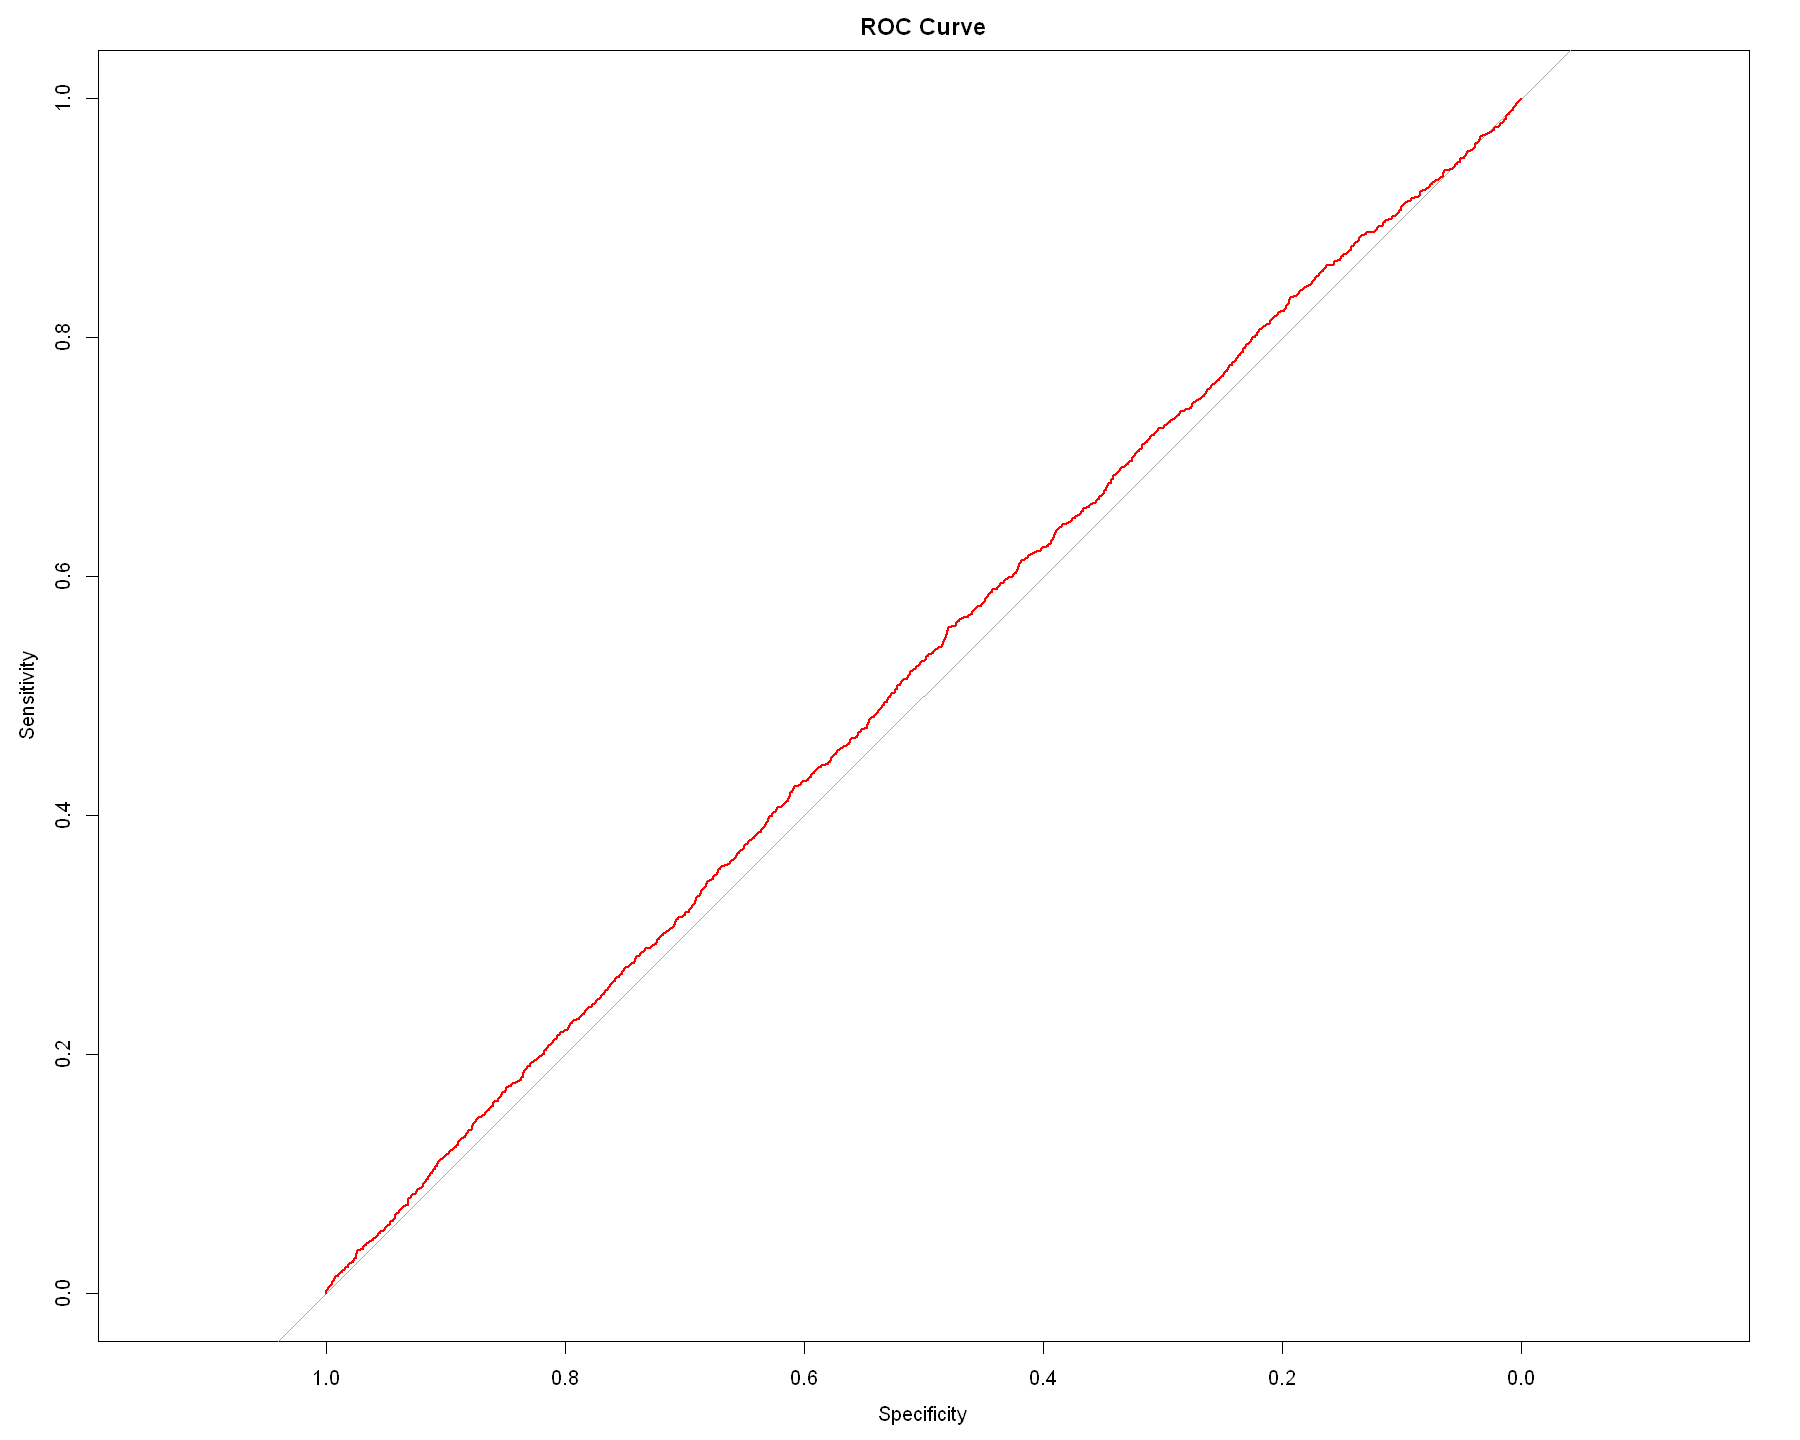

In [ ]:
roc_curve <- roc(test_data$Heart_Attack_Risk, predicted_prob)
plot(roc_curve, main  = "ROC Curve of Simplified Model", col = "red")

auc_value <- auc(roc_curve)
cat("AUC Value:", auc_value, "\n")

### Random Forest Model

Warning message:
"package 'randomForest' is in use and will not be installed"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Random Forest AUC Value: 0.9071212 


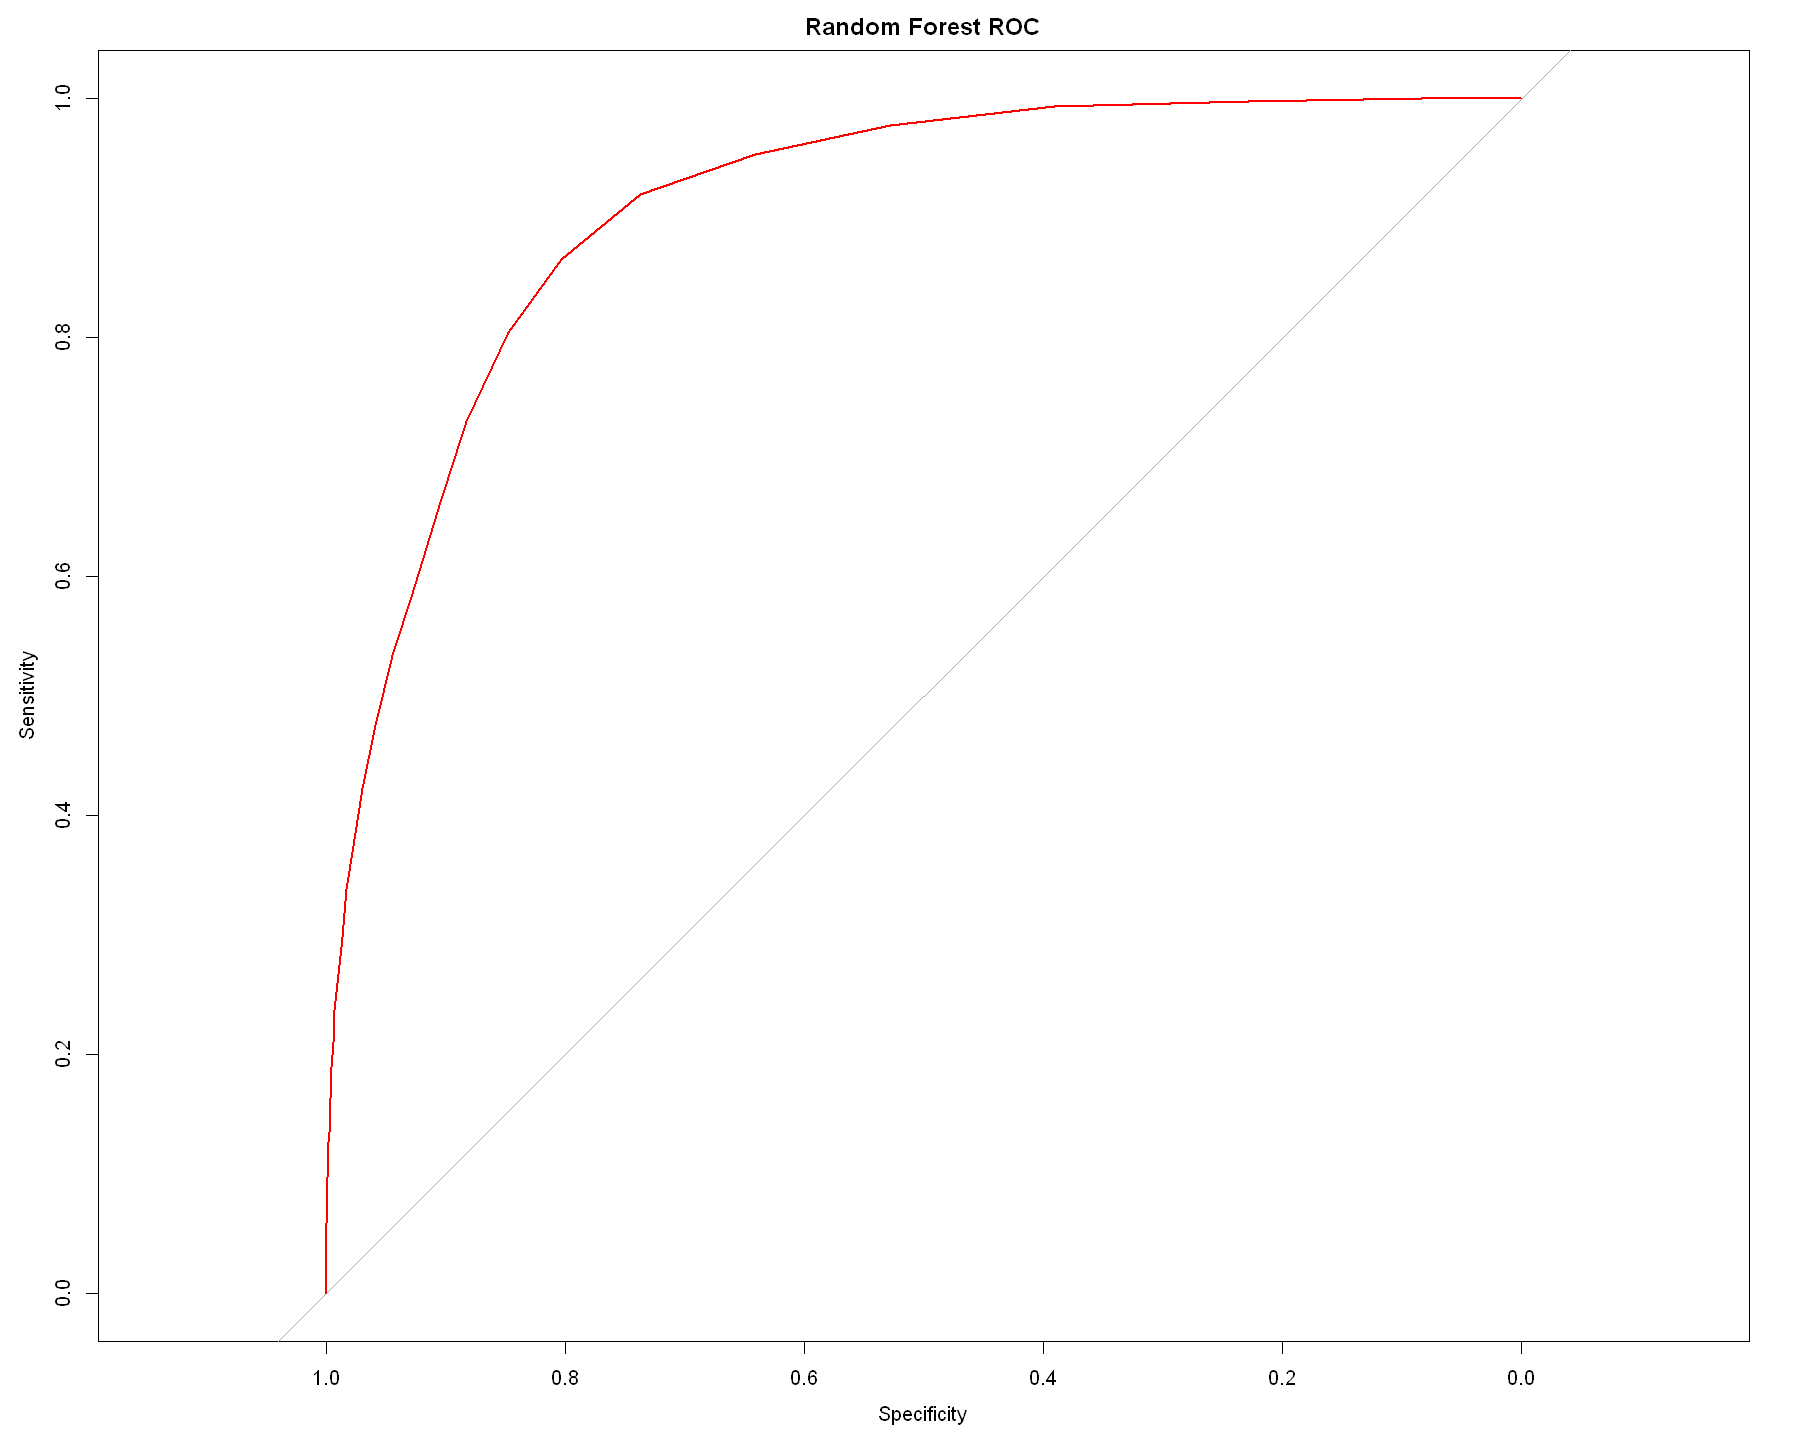

In [ ]:
# Random Forest Model

train_data$Heart_Attack_Risk <- as.factor(train_data$Heart_Attack_Risk)
test_data$Heart_Attack_Risk <- as.factor(test_data$Heart_Attack_Risk)

set.seed(123)
rf_model <- randomForest(
    Heart_Attack_Risk ~ .,
    data = train_data,
    ntree = 150,
    mtry = 1
)

predicted_prob_rf <- predict(rf_model, newdata = test_data, type = "prob")[, 2]

roc_curve_rf <- roc(test_data$Heart_Attack_Risk, predicted_prob_rf)
auc_value_rf <- auc(roc_curve_rf)
cat("Random Forest AUC Value:", auc_value_rf, "\n")

plot(roc_curve_rf, main = "Random Forest ROC", col = 'red', lwd = 2)

## 4. Discussion

## 5. Reference

1. Ndumele, C. E., Matsushita, K., Lazo, M., Bello, N., Blumenthal, R. S., Gerstenblith, G., Nambi, V., Ballantyne, C. M., Solomon, S. D., Selvin, E., Folsom, A. R., & Coresh, J. (2014). Obesity, subclinical myocardial injury, and incident heart failure. JACC: Heart Failure, 2(6), 600–607.
https://doi.org/10.1016/j.jchf.2014.05.017
3. World Health Organization. (2017). Cardiovascular diseases (CVDs). Retrieved from https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)